# Evaluation Baseline Model

import statements:

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from keras.layers import Dense, Dropout

import tensorflow as tf
import numpy as np

define model:

In [2]:
class Stateless(tf.keras.Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.layer1 = Dense(units=128, activation='relu')    #NOTE change for sync to evaluate when synchronizing
        self.layer2 = Dense(units=128, activation='relu')
        self.dropout = Dropout(0.2)
        self.layer3 = Dense(64, activation='relu')
        self.out = Dense(1,  activation="sigmoid")

    def call(self, inputs, training=None, mask=None):
        var = self.layer1(inputs)
        var = self.layer2(var)
        var = self.dropout(var)
        var = self.layer3(var)
        out = self.out(var)
        return out
    
model = Stateless()

In [3]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy(),
            tf.keras.metrics.TruePositives(), 
            tf.keras.metrics.TrueNegatives(),
            tf.keras.metrics.FalsePositives(), 
            tf.keras.metrics.FalseNegatives(),
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall(),
            tf.keras.metrics.F1Score()])

### Dataset

In [4]:
path = './data'
BATCH_SIZE = 1024

In [5]:
transactions = np.load(f'{path}/train/transactions.npy')
labels = np.load(f'{path}/train/all_transaction_labels.npy').astype(float)
train_set = tf.data.Dataset.from_tensor_slices((transactions, labels)).batch(BATCH_SIZE)


transactions = np.load(f'{path}/test/transactions.npy')
labels = np.load(f'{path}/test/all_transaction_labels.npy').astype(float)
test_set = tf.data.Dataset.from_tensor_slices((transactions, labels)).batch(BATCH_SIZE)

### Train model

In [6]:
num_epochs = 20
results = []

In [7]:
for epoch in range(num_epochs):
    print(f"[EPOCH {epoch}]")
    with tf.device("/gpu:0"):
        model.fit(train_set, verbose='2', shuffle=True)
        results.append(model.evaluate(test_set, return_dict=True))

        weight_path = f'machine_learning/saved_models/baseline/Baseline_{epoch}.keras'
        model.save_weights(
            filepath=weight_path,
            save_format='h5'
        )
        

[EPOCH 0]
543/543 [==============================] - 1s 1ms/step - loss: 0.0352 - binary_accuracy: 0.9961 - true_positives: 0.0000e+00 - true_negatives: 553574.0000 - false_positives: 0.0000e+00 - false_negatives: 2145.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0077
[EPOCH 1]
543/543 [==============================] - 1s 1ms/step - loss: 0.0212 - binary_accuracy: 0.9961 - true_positives: 0.0000e+00 - true_negatives: 553574.0000 - false_positives: 0.0000e+00 - false_negatives: 2145.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0077
[EPOCH 2]
543/543 [==============================] - 1s 1ms/step - loss: 0.0185 - binary_accuracy: 0.9961 - true_positives: 0.0000e+00 - true_negatives: 553574.0000 - false_positives: 0.0000e+00 - false_negatives: 2145.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0077
[EPOCH 3]
543/543 [==============================] - 1s 1ms/step - loss: 0.0200 - binary_accuracy: 0.9962 - true_positives: 389.0000 - t

In [8]:
import pandas as pd

pd.DataFrame(results)

,loss,binary_accuracy,true_positives,true_negatives,false_positives,false_negatives,precision,recall,f1_score
0,0.035246,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000,[0.007690046]
1,0.021250,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000,[0.007690046]
2,0.018490,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000,[0.007690046]
3,0.020034,0.996208,389.0,553223.0,351.0,1756.0,0.525676,0.181352,[0.007690046]
4,0.019635,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000,[0.007690046]
5,0.019670,0.996129,0.0,553568.0,6.0,2145.0,0.000000,0.000000,[0.007690046]
6,0.019548,0.996126,515.0,553051.0,523.0,1630.0,0.496146,0.240093,[0.007690046]
7,0.017911,0.995881,551.0,552879.0,695.0,1594.0,0.442215,0.256876,[0.007690046]
8,0.019123,0.996270,543.0,553103.0,471.0,1602.0,0.535503,0.253147,[0.007690046]
9,0.021792,0.995897,766.0,552673.0,901.0,1379.0,0.459508,0.357110,[0.007690046]


Looking at the metrics, the one which yielded the best results was at **epoch 16** with the best balance between precision and recall:

### Confusion Matrix

In [22]:
inputs = [[553085/(553085+272), 272/(553085+272)], [1360/(785+1360), 785/(785+1360)]]

In [23]:
inputs

[[0.9995084547588627, 0.0004915452411372766],
 [0.634032634032634, 0.36596736596736595]]

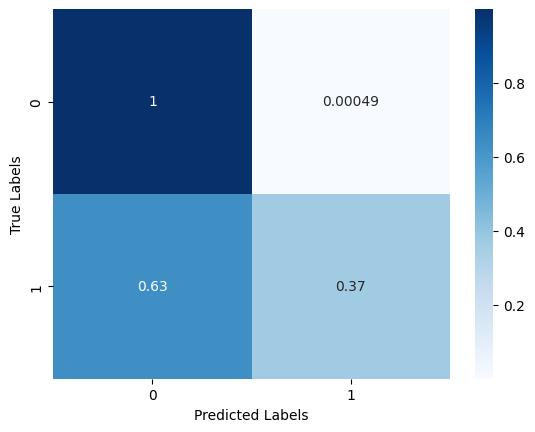

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using a heatmap
sns.heatmap(inputs, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [25]:
y_pred_proba = model.predict(transactions)

17367/17367 [==============================] - 7s 386us/step


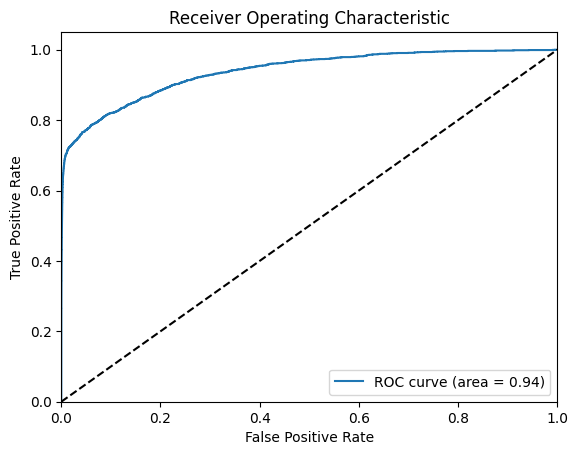

In [29]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, and thresholds using NumPy
fpr, tpr, thresholds = roc_curve(labels, y_pred_proba)

# Calculate AUC using scikit-learn
auc_score = auc(fpr, tpr)

# Plot ROC curve using Matplotlib
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
